---

## Congratulations!

You now understand the probabilistic foundations of deep learning!

### Summary: Probability Concepts in Deep Learning

| Chapter | Concept | Deep Learning Application |
|---------|---------|---------------------------|
| 0 | Probability basics | Neural networks output probabilities |
| 1 | Sample space, events | Classification over possible classes |
| 2 | Addition/multiplication rules | Combining predictions |
| 3 | Conditional probability | P(class \| input) - core of classification |
| 4 | Bayes' theorem | Bayesian neural networks, belief updating |
| 5 | Random variables | Modeling predictions as distributions |
| 6 | Distributions | Bernoulli (binary), Categorical (multi-class), Gaussian (weights) |
| 7 | Expectation/Variance | Batch normalization, uncertainty estimation |
| 8 | Maximum Likelihood | Training = maximizing likelihood! |
| 9 | Information theory | Cross-entropy loss function |

### Key Takeaways

1. **Neural networks are probability machines** - they estimate P(output | input)
2. **Softmax creates valid probability distributions** - outputs sum to 1
3. **Cross-entropy loss comes from probability** - it's negative log-likelihood
4. **Training maximizes likelihood** - finding parameters that best explain the data
5. **Variance measures uncertainty** - batch norm and weight init control it

---

*This notebook is part of the Deep Learning Fundamentals course.*

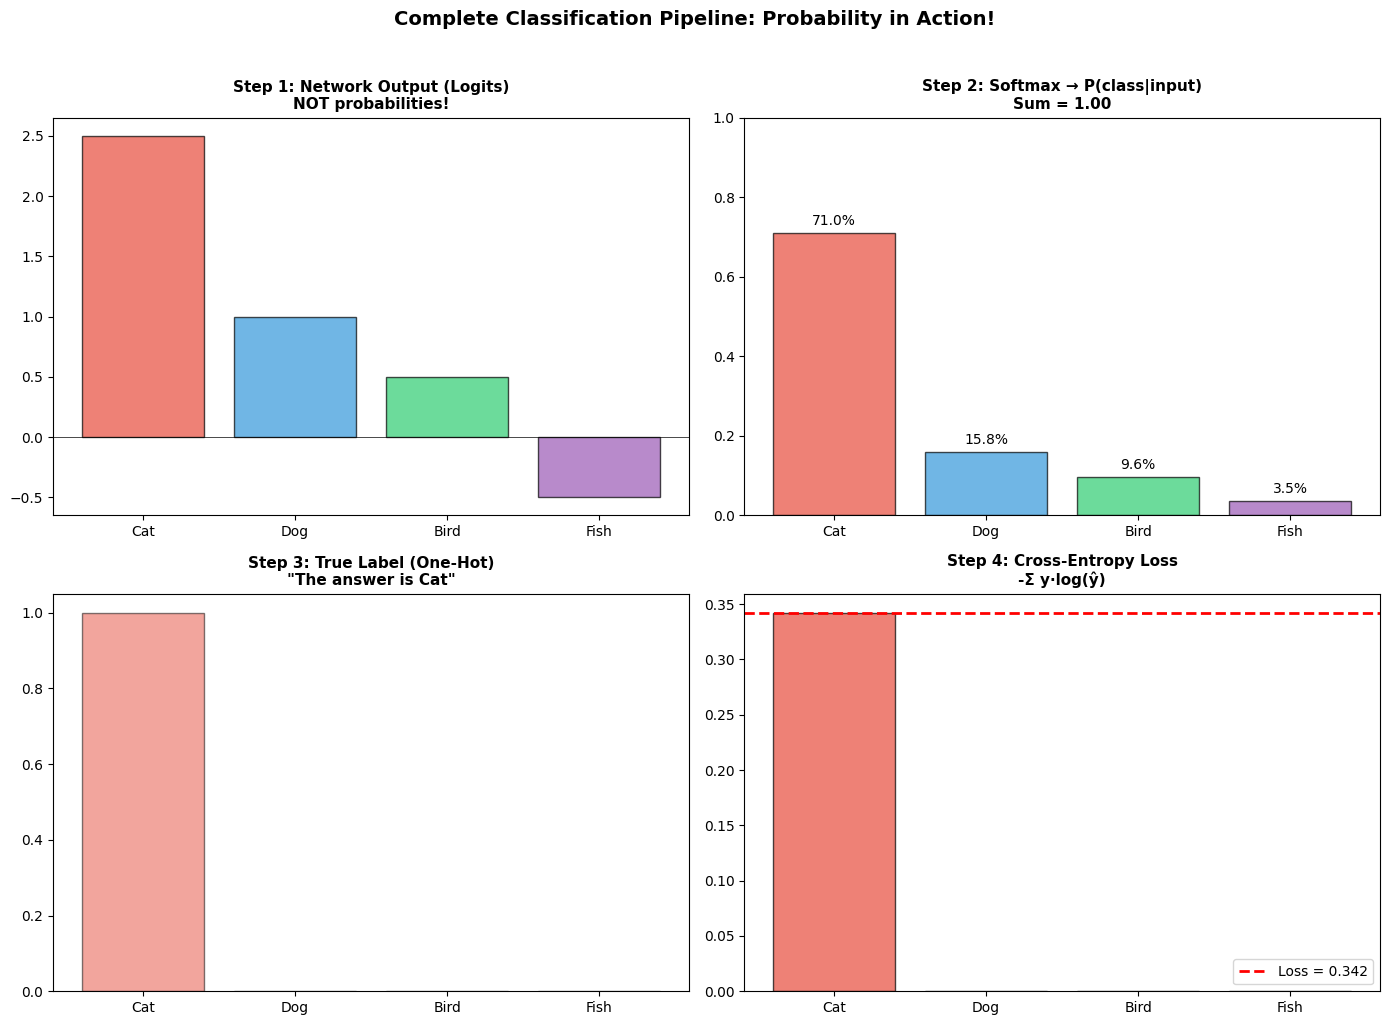

COMPLETE SUMMARY
1. Logits (raw):     [ 2.5  1.   0.5 -0.5]
2. Softmax (PMF):    [0.71  0.158 0.096 0.035] → Categorical Distribution!
3. True label:       [1 0 0 0]
4. Cross-entropy:    0.3423

Prediction: Cat (71.0% confidence)


In [ ]:
# Complete Classification Pipeline

import numpy as np
import matplotlib.pyplot as plt

def softmax(logits):
    exp_logits = np.exp(logits - np.max(logits))
    return exp_logits / np.sum(exp_logits)

def cross_entropy_loss(y_true, y_pred):
    return -np.sum(y_true * np.log(y_pred + 1e-15))

# Simulate neural network
np.random.seed(42)
logits = np.array([2.5, 1.0, 0.5, -0.5])
classes = ['Cat', 'Dog', 'Bird', 'Fish']
y_true = np.array([1, 0, 0, 0])  # True: Cat
y_pred = softmax(logits)
loss = cross_entropy_loss(y_true, y_pred)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
colors = ['#e74c3c', '#3498db', '#2ecc71', '#9b59b6']

# Step 1: Logits
axes[0,0].bar(classes, logits, color=colors, edgecolor='black', alpha=0.7)
axes[0,0].axhline(y=0, color='black', linewidth=0.5)
axes[0,0].set_title('Step 1: Network Output (Logits)\nNOT probabilities!', fontsize=11, fontweight='bold')

# Step 2: Softmax
axes[0,1].bar(classes, y_pred, color=colors, edgecolor='black', alpha=0.7)
axes[0,1].set_ylim(0, 1)
axes[0,1].set_title(f'Step 2: Softmax → P(class|input)\nSum = {y_pred.sum():.2f}', fontsize=11, fontweight='bold')
for i, p in enumerate(y_pred):
    axes[0,1].text(i, p + 0.02, f'{p:.1%}', ha='center')

# Step 3: True label
axes[1,0].bar(classes, y_true, color=colors, edgecolor='black', alpha=0.5)
axes[1,0].set_title('Step 3: True Label (One-Hot)\n"The answer is Cat"', fontsize=11, fontweight='bold')

# Step 4: Loss
loss_contrib = -y_true * np.log(y_pred + 1e-15)
axes[1,1].bar(classes, loss_contrib, color=colors, edgecolor='black', alpha=0.7)
axes[1,1].axhline(y=loss, color='red', linewidth=2, linestyle='--', label=f'Loss = {loss:.3f}')
axes[1,1].set_title('Step 4: Cross-Entropy Loss\n-Σ y·log(ŷ)', fontsize=11, fontweight='bold')
axes[1,1].legend()

plt.suptitle('Complete Classification Pipeline: Probability in Action!', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("COMPLETE SUMMARY")
print("="*60)
print(f"1. Logits (raw):     {logits}")
print(f"2. Softmax (PMF):    {y_pred.round(3)} → Categorical Distribution!")
print(f"3. True label:       {y_true}")
print(f"4. Cross-entropy:    {loss:.4f}")
print(f"\nPrediction: {classes[np.argmax(y_pred)]} ({y_pred.max():.1%} confidence)")

---

# Chapter 10: Everything Comes Together

## The Complete Neural Network Classification Pipeline

Let's see how ALL the probability concepts work together in a neural network!

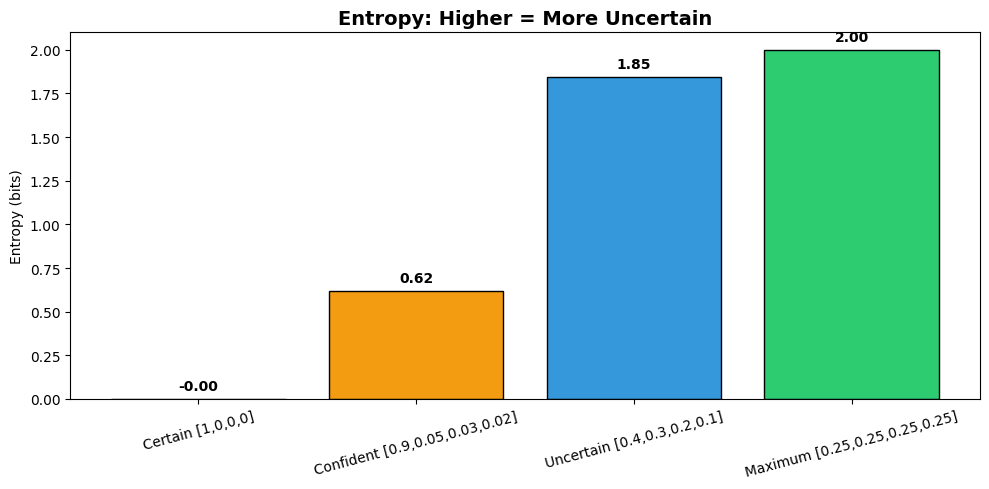

Entropy Interpretation:
• Certain (H=0): No uncertainty
• Maximum (H=2): Maximum uncertainty for 4 classes

In neural networks: Low entropy = confident prediction


In [ ]:
# Entropy: Measuring Prediction Confidence

def entropy(p):
    p = np.array(p)
    p = p[p > 0]
    return -np.sum(p * np.log2(p))

distributions = {
    'Certain [1,0,0,0]': [1, 0, 0, 0],
    'Confident [0.9,0.05,0.03,0.02]': [0.9, 0.05, 0.03, 0.02],
    'Uncertain [0.4,0.3,0.2,0.1]': [0.4, 0.3, 0.2, 0.1],
    'Maximum [0.25,0.25,0.25,0.25]': [0.25, 0.25, 0.25, 0.25]
}

fig, ax = plt.subplots(figsize=(10, 5))
entropies = [entropy(d) for d in distributions.values()]
colors = ['#e74c3c', '#f39c12', '#3498db', '#2ecc71']
bars = ax.bar(list(distributions.keys()), entropies, color=colors, edgecolor='black')
ax.set_ylabel('Entropy (bits)')
ax.set_title('Entropy: Higher = More Uncertain', fontsize=14, fontweight='bold')

for bar, h in zip(bars, entropies):
    ax.text(bar.get_x() + bar.get_width()/2, h + 0.05, f'{h:.2f}', ha='center', fontweight='bold')

plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

print("Entropy Interpretation:")
print("• Certain (H=0): No uncertainty")
print("• Maximum (H=2): Maximum uncertainty for 4 classes")
print("\nIn neural networks: Low entropy = confident prediction")

---

# Chapter 9: Information Theory

## Entropy: Measuring Uncertainty

**Entropy** measures how "unpredictable" a distribution is:
- Low entropy = Confident (predictable)
- High entropy = Uncertain (unpredictable)

**Formula**: H(p) = -Σ pᵢ log(pᵢ)

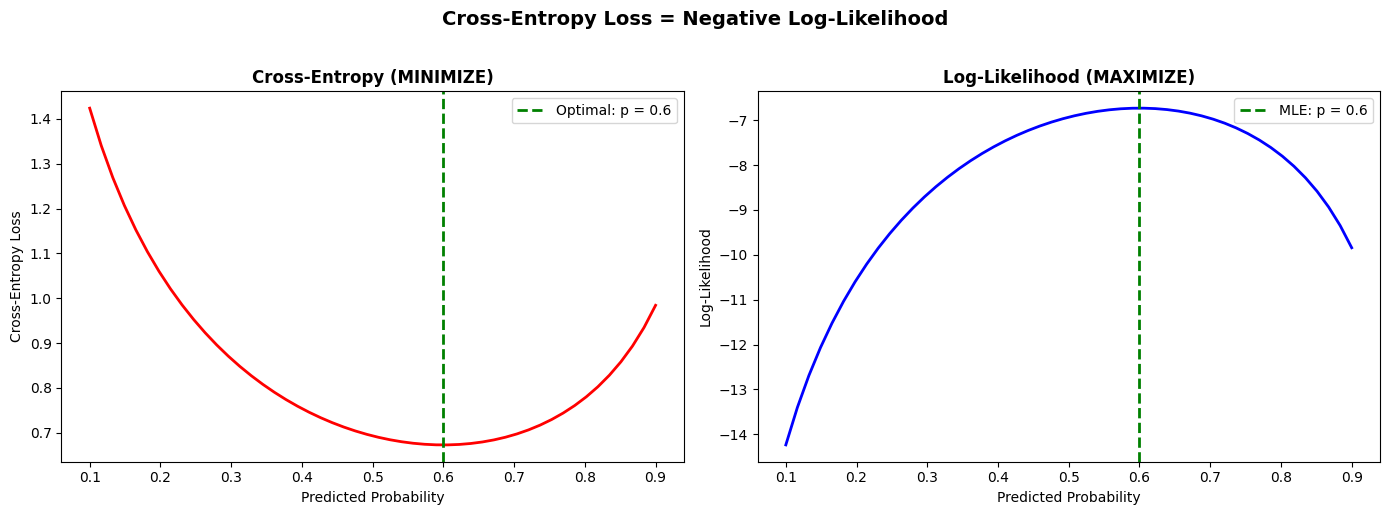

THE KEY INSIGHT:
Minimizing Cross-Entropy = Maximizing Log-Likelihood

Therefore: Training with cross-entropy = Maximum Likelihood Estimation!


In [ ]:
# The Connection: Cross-Entropy = Negative Log-Likelihood

# True labels
y_true = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 1])  # 6 ones, 4 zeros

# Try different prediction probabilities
p_values = np.linspace(0.1, 0.9, 50)
cross_entropies = []
log_likelihoods = []

for p in p_values:
    ce = -np.mean(y_true * np.log(p) + (1 - y_true) * np.log(1 - p))
    cross_entropies.append(ce)
    ll = np.sum(y_true * np.log(p) + (1 - y_true) * np.log(1 - p))
    log_likelihoods.append(ll)

p_mle = y_true.mean()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(p_values, cross_entropies, 'r-', linewidth=2)
axes[0].axvline(x=p_mle, color='green', linewidth=2, linestyle='--', label=f'Optimal: p = {p_mle}')
axes[0].set_xlabel('Predicted Probability')
axes[0].set_ylabel('Cross-Entropy Loss')
axes[0].set_title('Cross-Entropy (MINIMIZE)', fontsize=12, fontweight='bold')
axes[0].legend()

axes[1].plot(p_values, log_likelihoods, 'b-', linewidth=2)
axes[1].axvline(x=p_mle, color='green', linewidth=2, linestyle='--', label=f'MLE: p = {p_mle}')
axes[1].set_xlabel('Predicted Probability')
axes[1].set_ylabel('Log-Likelihood')
axes[1].set_title('Log-Likelihood (MAXIMIZE)', fontsize=12, fontweight='bold')
axes[1].legend()

plt.suptitle('Cross-Entropy Loss = Negative Log-Likelihood', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("THE KEY INSIGHT:")
print("="*50)
print("Minimizing Cross-Entropy = Maximizing Log-Likelihood")
print("\nTherefore: Training with cross-entropy = Maximum Likelihood Estimation!")

---

# Chapter 8: Maximum Likelihood Estimation

## How Neural Networks Learn

The key insight: **Training a neural network = Maximizing the likelihood of the data**

**Likelihood**: Given parameters θ, how likely is the data we observed?

**MLE**: Find parameters that make our data most likely!

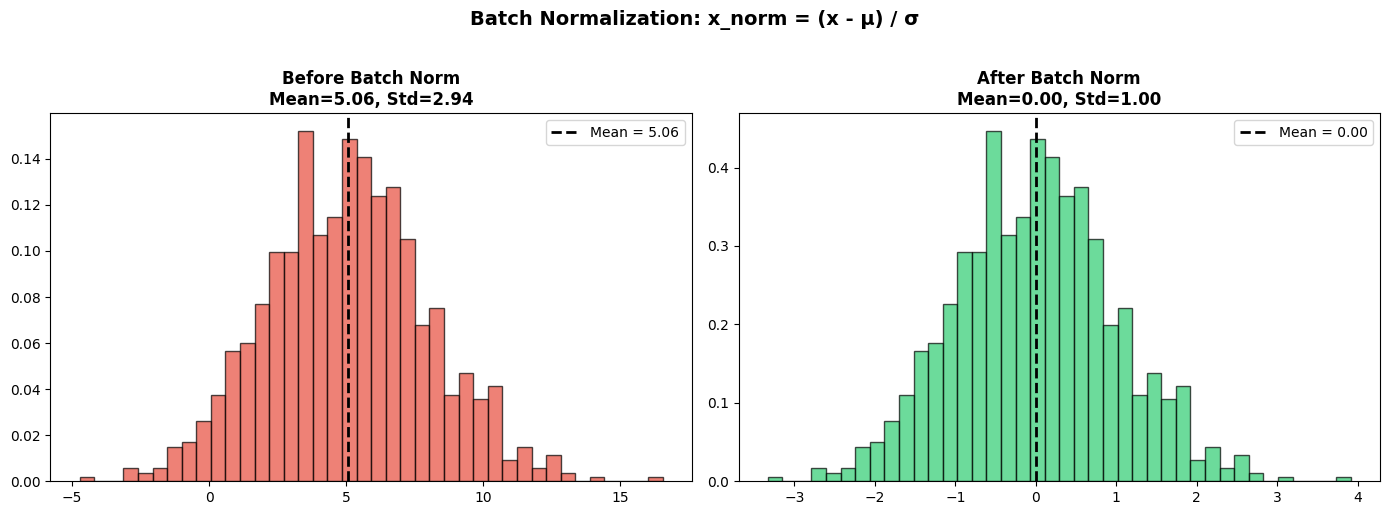

Why Batch Normalization helps:
• Centers data (mean=0) and scales it (std=1)
• Training becomes faster and more stable
• Acts as regularization


In [ ]:
# Batch Normalization uses Mean and Variance

np.random.seed(42)

# Simulate activations before batch norm
activations = np.random.randn(1000) * 3 + 5  # Mean≈5, Std≈3

# Batch normalization: (x - mean) / std
mean = np.mean(activations)
std = np.std(activations)
normalized = (activations - mean) / std

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(activations, bins=40, color='#e74c3c', edgecolor='black', alpha=0.7, density=True)
axes[0].axvline(x=mean, color='black', linewidth=2, linestyle='--', label=f'Mean = {mean:.2f}')
axes[0].set_title(f'Before Batch Norm\nMean={mean:.2f}, Std={std:.2f}', fontsize=12, fontweight='bold')
axes[0].legend()

axes[1].hist(normalized, bins=40, color='#2ecc71', edgecolor='black', alpha=0.7, density=True)
axes[1].axvline(x=0, color='black', linewidth=2, linestyle='--', label=f'Mean = {np.mean(normalized):.2f}')
axes[1].set_title(f'After Batch Norm\nMean={np.mean(normalized):.2f}, Std={np.std(normalized):.2f}', fontsize=12, fontweight='bold')
axes[1].legend()

plt.suptitle('Batch Normalization: x_norm = (x - μ) / σ', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("Why Batch Normalization helps:")
print("• Centers data (mean=0) and scales it (std=1)")
print("• Training becomes faster and more stable")
print("• Acts as regularization")

---

# Chapter 7: Expectation and Variance

## Summarizing Uncertainty with Numbers

- **Expectation E[X]**: The "average" or "center" of a distribution
- **Variance Var(X)**: The "spread" or "uncertainty" around the mean
- **Standard Deviation σ**: √Var(X) - same units as X

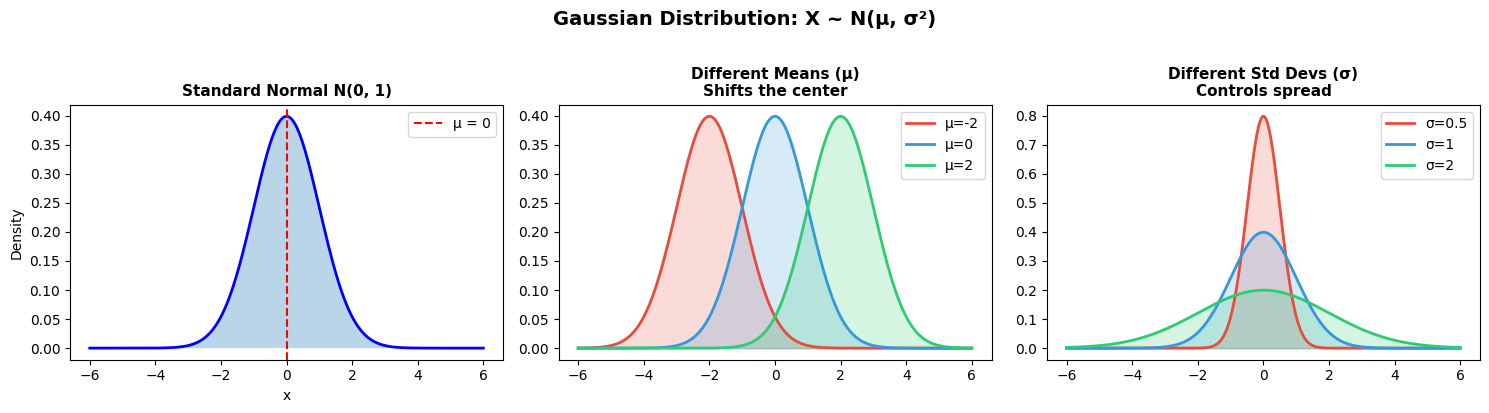

Why Gaussian is everywhere in deep learning:
• Weight initialization: W ~ N(0, σ²)
• VAE latent space: z ~ N(μ, σ²)
• Regression: assumes Gaussian errors


In [ ]:
from scipy import stats

# The Gaussian (Normal) Distribution - Most important for deep learning

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
x = np.linspace(-6, 6, 1000)

# Standard Normal
ax = axes[0]
y = stats.norm.pdf(x, 0, 1)
ax.plot(x, y, 'b-', linewidth=2)
ax.fill_between(x, y, alpha=0.3)
ax.axvline(x=0, color='red', linestyle='--', label='μ = 0')
ax.set_title('Standard Normal N(0, 1)', fontsize=11, fontweight='bold')
ax.set_xlabel('x')
ax.set_ylabel('Density')
ax.legend()

# Different means
ax = axes[1]
for mu, color in [(-2, '#e74c3c'), (0, '#3498db'), (2, '#2ecc71')]:
    y = stats.norm.pdf(x, mu, 1)
    ax.plot(x, y, color=color, linewidth=2, label=f'μ={mu}')
    ax.fill_between(x, y, alpha=0.2, color=color)
ax.set_title('Different Means (μ)\nShifts the center', fontsize=11, fontweight='bold')
ax.legend()

# Different standard deviations
ax = axes[2]
for sigma, color in [(0.5, '#e74c3c'), (1, '#3498db'), (2, '#2ecc71')]:
    y = stats.norm.pdf(x, 0, sigma)
    ax.plot(x, y, color=color, linewidth=2, label=f'σ={sigma}')
    ax.fill_between(x, y, alpha=0.2, color=color)
ax.set_title('Different Std Devs (σ)\nControls spread', fontsize=11, fontweight='bold')
ax.legend()

plt.suptitle('Gaussian Distribution: X ~ N(μ, σ²)', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("Why Gaussian is everywhere in deep learning:")
print("• Weight initialization: W ~ N(0, σ²)")
print("• VAE latent space: z ~ N(μ, σ²)")
print("• Regression: assumes Gaussian errors")

---

# Chapter 6: Probability Distributions

## Common Patterns in Randomness

Different types of random phenomena follow different **distributions**. The most important for deep learning:

| Distribution | Type | Use in Deep Learning |
|-------------|------|---------------------|
| **Bernoulli** | Discrete | Binary classification (sigmoid output) |
| **Categorical** | Discrete | Multi-class classification (softmax output) |
| **Gaussian** | Continuous | Weight initialization, regression, VAEs |

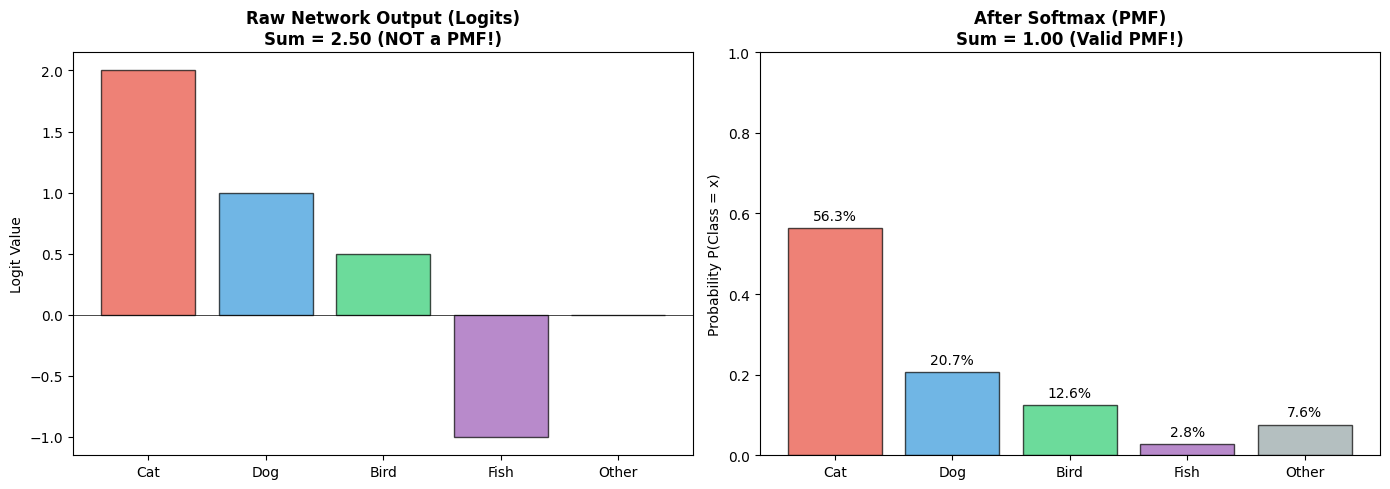

The random variable X = 'predicted class' has PMF:
  P(X = Cat) = 0.5630
  P(X = Dog) = 0.2071
  P(X = Bird) = 0.1256
  P(X = Fish) = 0.0280
  P(X = Other) = 0.0762

Sum of probabilities: 1.0000 = 1 ✓


In [ ]:
# Softmax creates a PMF (Probability Mass Function)

def softmax(logits):
    """Convert raw scores to probabilities (a PMF)"""
    exp_logits = np.exp(logits - np.max(logits))
    return exp_logits / np.sum(exp_logits)

# Neural network outputs (logits)
logits = np.array([2.0, 1.0, 0.5, -1.0, 0.0])
classes = ['Cat', 'Dog', 'Bird', 'Fish', 'Other']

# Convert to PMF
pmf = softmax(logits)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

colors = ['#e74c3c', '#3498db', '#2ecc71', '#9b59b6', '#95a5a6']
axes[0].bar(classes, logits, color=colors, edgecolor='black', alpha=0.7)
axes[0].axhline(y=0, color='black', linewidth=0.5)
axes[0].set_ylabel('Logit Value')
axes[0].set_title(f'Raw Network Output (Logits)\nSum = {logits.sum():.2f} (NOT a PMF!)',
                  fontsize=12, fontweight='bold')

axes[1].bar(classes, pmf, color=colors, edgecolor='black', alpha=0.7)
axes[1].set_ylabel('Probability P(Class = x)')
axes[1].set_title(f'After Softmax (PMF)\nSum = {pmf.sum():.2f} (Valid PMF!)',
                  fontsize=12, fontweight='bold')
axes[1].set_ylim(0, 1)

for i, p in enumerate(pmf):
    axes[1].text(i, p + 0.02, f'{p:.1%}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

print("The random variable X = 'predicted class' has PMF:")
for cls, prob in zip(classes, pmf):
    print(f"  P(X = {cls}) = {prob:.4f}")
print(f"\nSum of probabilities: {pmf.sum():.4f} = 1 ✓")

### Deep Learning Connection: Softmax as a PMF

When a neural network outputs class probabilities, it's creating a PMF (Probability Mass Function)!

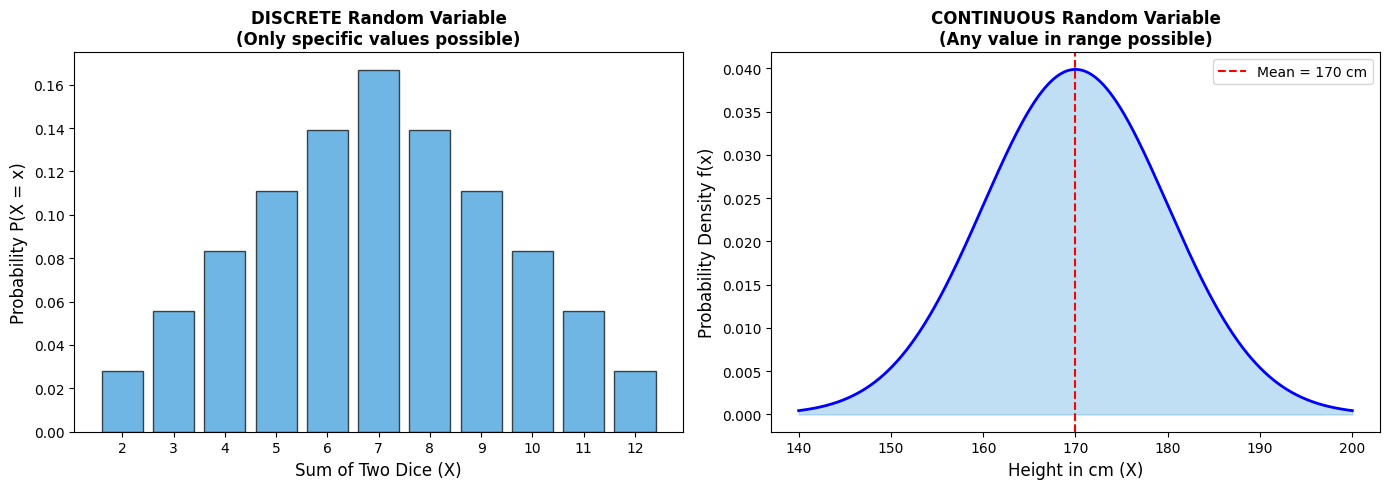

Key Difference:
• Discrete: We ask P(X = x) - probability of exact value
• Continuous: We ask P(a < X < b) - probability of range
  (For continuous, P(X = exact value) = 0!)


In [ ]:
# Visualizing discrete vs continuous random variables

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Discrete: Sum of two dice
ax = axes[0]
dice_sums = []
for d1 in range(1, 7):
    for d2 in range(1, 7):
        dice_sums.append(d1 + d2)

values, counts = np.unique(dice_sums, return_counts=True)
probabilities = counts / 36

ax.bar(values, probabilities, color='#3498db', edgecolor='black', alpha=0.7)
ax.set_xlabel('Sum of Two Dice (X)', fontsize=12)
ax.set_ylabel('Probability P(X = x)', fontsize=12)
ax.set_title('DISCRETE Random Variable\n(Only specific values possible)', fontsize=12, fontweight='bold')
ax.set_xticks(values)

# Continuous: Height
ax = axes[1]
x = np.linspace(140, 200, 1000)
mean_height, std_height = 170, 10
pdf = stats.norm.pdf(x, mean_height, std_height)

ax.plot(x, pdf, 'b-', linewidth=2)
ax.fill_between(x, pdf, alpha=0.3, color='#3498db')
ax.axvline(x=mean_height, color='red', linestyle='--', label=f'Mean = {mean_height} cm')
ax.set_xlabel('Height in cm (X)', fontsize=12)
ax.set_ylabel('Probability Density f(x)', fontsize=12)
ax.set_title('CONTINUOUS Random Variable\n(Any value in range possible)', fontsize=12, fontweight='bold')
ax.legend()

plt.tight_layout()
plt.show()

print("Key Difference:")
print("• Discrete: We ask P(X = x) - probability of exact value")
print("• Continuous: We ask P(a < X < b) - probability of range")
print("  (For continuous, P(X = exact value) = 0!)")

# Probability Fundamentals for Deep Learning

## A Gentle, Intuitive Journey from Zero to Hero

---

**Welcome!** If you've ever wondered why neural networks output "probabilities" or what "cross-entropy loss" actually means, you're in the right place.

This notebook will take you on a journey through probability theory - not by throwing formulas at you, but by building **intuition first**. We'll use stories, visualizations, and real-world examples before we ever write an equation.

### Who Is This For?

- Beginners to deep learning who want to understand the foundations
- Anyone who finds probability confusing or abstract
- Practitioners who use cross-entropy loss but want to understand *why* it works

### Our Philosophy

> **"Intuition first, math second."**

Every concept will follow this pattern:
1. **Story/Example** - A real situation that illustrates the concept
2. **Visual** - A picture that builds intuition
3. **Math** - The formal definition (once you already understand it)
4. **Code** - See it in action
5. **Deep Learning Connection** - Why this matters for neural networks

---

## Table of Contents

| Chapter | Topic | Key Question |
|---------|-------|--------------|
| 0 | What is Probability? | How do we measure uncertainty? |
| 1 | The Language of Probability | What are events, outcomes, sample spaces? |
| 2 | Basic Probability Rules | How do we combine probabilities? |
| 3 | Conditional Probability | How does new information change beliefs? |
| 4 | Bayes' Theorem | How do we update beliefs with evidence? |
| 5 | Random Variables | How do we describe uncertain quantities? |
| 6 | Probability Distributions | What patterns does randomness follow? |
| 7 | Expectation & Variance | What's the "average" and "spread"? |
| 8 | Maximum Likelihood | How do we learn from data? |
| 9 | Information Theory | How do we measure information? |
| 10 | Connecting to Deep Learning | How does this all fit together? |

---

## Setup

Let's import the libraries we'll use. Don't worry about understanding these yet - just run the cell!

In [ ]:
# Core libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Beautiful visualizations
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

# For reproducibility
np.random.seed(42)

print("Setup complete! Let's learn probability.")

Setup complete! Let's learn probability.


---

# Chapter 0: What is Probability?

## The Big Picture

Before we dive into formulas and code, let's understand what probability actually *is* and why we need it.

---

### The Problem: Uncertainty is Everywhere

Think about your daily life:

- **Weather**: Will it rain tomorrow? (You check the forecast: "70% chance of rain")
- **Traffic**: Will I be late for work? (Depends on accidents, construction, etc.)
- **Health**: Does this patient have the disease? (Medical tests aren't perfect)
- **Sports**: Will my team win? (Even the best teams sometimes lose)

The world is full of things we can't predict with certainty. **Probability is our tool for reasoning about uncertainty.**

---

### A Simple Definition

> **Probability** is a number between 0 and 1 that measures how likely something is to happen.

| Probability | Meaning | Example |
|-------------|---------|--------|
| 0 | Impossible | Sun rising in the West |
| 0.01 (1%) | Very unlikely | Winning the lottery |
| 0.5 (50%) | Equal chance | Fair coin landing heads |
| 0.9 (90%) | Very likely | Sun rising tomorrow |
| 1 | Certain | 1 + 1 = 2 |

---

### Why Does Deep Learning Care About Probability?

Here's the key insight:

> **Neural networks don't give definitive answers. They give probabilistic predictions.**

When you show an image to an image classifier, it doesn't say "This IS a cat." Instead, it says:

- "I'm 95% confident this is a cat"
- "There's a 3% chance it's a dog"
- "There's a 2% chance it's something else"

These percentages are **probabilities**. The entire output of a classification neural network is a **probability distribution** over possible classes.

Let's visualize this:

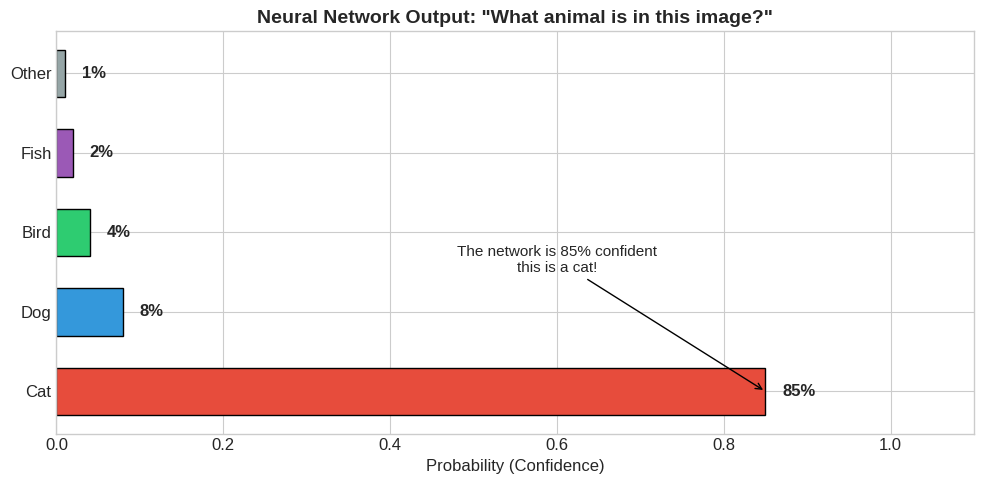

Sum of all probabilities: 1.00

This is a PROBABILITY DISTRIBUTION - all options sum to 1!


In [ ]:
# A neural network's output for an image classification
# The network is shown a picture and outputs its "beliefs"

classes = ['Cat', 'Dog', 'Bird', 'Fish', 'Other']
probabilities = [0.85, 0.08, 0.04, 0.02, 0.01]  # Must sum to 1!

# Create a nice visualization
fig, ax = plt.subplots(figsize=(10, 5))

colors = ['#e74c3c', '#3498db', '#2ecc71', '#9b59b6', '#95a5a6']
bars = ax.barh(classes, probabilities, color=colors, edgecolor='black', height=0.6)

# Add percentage labels
for bar, prob in zip(bars, probabilities):
    ax.text(prob + 0.02, bar.get_y() + bar.get_height()/2,
            f'{prob:.0%}', va='center', fontsize=12, fontweight='bold')

ax.set_xlabel('Probability (Confidence)', fontsize=12)
ax.set_title('Neural Network Output: "What animal is in this image?"', fontsize=14, fontweight='bold')
ax.set_xlim(0, 1.1)

# Add annotation
ax.annotate('The network is 85% confident\nthis is a cat!',
            xy=(0.85, 0), xytext=(0.6, 1.5),
            fontsize=11, ha='center',
            arrowprops=dict(arrowstyle='->', color='black'))

plt.tight_layout()
plt.show()

print(f"Sum of all probabilities: {sum(probabilities):.2f}")
print("\nThis is a PROBABILITY DISTRIBUTION - all options sum to 1!")

### Key Insight #1: Probabilities Must Sum to 1

Notice that all the probabilities above add up to exactly 1 (100%). This isn't a coincidence - it's a fundamental rule:

> **When listing all possible outcomes, their probabilities must sum to 1.**

Why? Because *something* has to happen! If we've listed every possible outcome, one of them must occur.

This is exactly what the **softmax** function does in neural networks - it takes raw numbers and converts them to probabilities that sum to 1. We'll explore this in detail later.

---

### Two Ways to Think About Probability

There are actually two philosophical interpretations of probability. Both are useful:

#### 1. Frequentist View: Long-run frequency

> "If I flip this coin many times, what fraction will be heads?"

The probability is the limit of (number of times event happened) / (total trials) as trials approach infinity.

#### 2. Bayesian View: Degree of belief

> "Given what I know, how confident am I that this will happen?"

The probability represents our uncertainty, which can be updated as we get new information.

**In deep learning, we use both views:**
- Training uses frequentist ideas (repeat over many examples)
- Prediction uses Bayesian ideas (express confidence in predictions)

---

### Let's Build Intuition: The Coin Flip

The simplest probability experiment is flipping a coin. Let's see how the frequentist interpretation works:

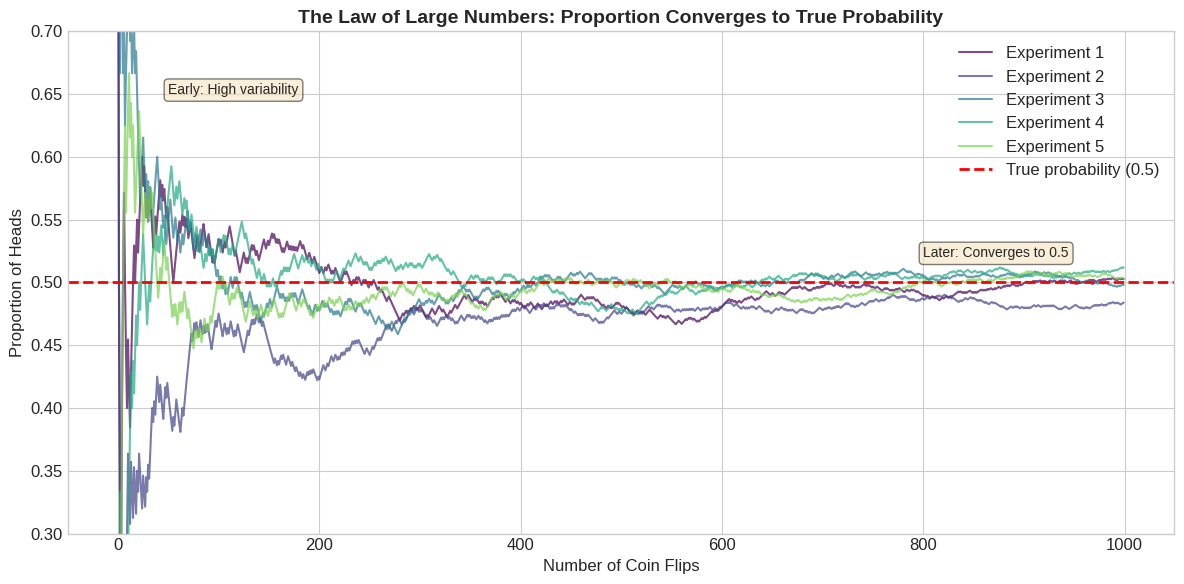

Observe how the proportion stabilizes around 0.5 as we flip more coins!
This is the 'Law of Large Numbers' in action.


In [ ]:
# Simulating coin flips to understand probability

def simulate_coin_flips(n_flips, true_prob_heads=0.5):
    """Flip a coin n times and track the running proportion of heads"""
    flips = np.random.random(n_flips) < true_prob_heads  # True = Heads
    cumulative_heads = np.cumsum(flips)
    flip_numbers = np.arange(1, n_flips + 1)
    running_proportion = cumulative_heads / flip_numbers
    return running_proportion

# Run multiple experiments
n_flips = 1000
n_experiments = 5

fig, ax = plt.subplots(figsize=(12, 6))

colors = plt.cm.viridis(np.linspace(0, 0.8, n_experiments))
for i in range(n_experiments):
    proportions = simulate_coin_flips(n_flips)
    ax.plot(proportions, color=colors[i], alpha=0.7, linewidth=1.5, label=f'Experiment {i+1}')

# Add the true probability line
ax.axhline(y=0.5, color='red', linestyle='--', linewidth=2, label='True probability (0.5)')

ax.set_xlabel('Number of Coin Flips', fontsize=12)
ax.set_ylabel('Proportion of Heads', fontsize=12)
ax.set_title('The Law of Large Numbers: Proportion Converges to True Probability',
             fontsize=14, fontweight='bold')
ax.set_ylim(0.3, 0.7)
ax.legend(loc='upper right')

# Add annotations
ax.annotate('Early: High variability', xy=(50, 0.65), fontsize=10,
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
ax.annotate('Later: Converges to 0.5', xy=(800, 0.52), fontsize=10,
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print("Observe how the proportion stabilizes around 0.5 as we flip more coins!")
print("This is the 'Law of Large Numbers' in action.")

### What Did We Learn?

1. **Early on** (few flips): The proportion is highly variable. After 10 flips, you might have 70% heads or 30% heads.

2. **As we flip more**: The proportion stabilizes and approaches the true probability (0.5).

3. **The Law of Large Numbers**: With enough trials, the observed frequency approaches the true probability.

**Deep Learning Connection**: This is why we need lots of training data! With more examples, our model's learned probabilities become more accurate.

---

## Chapter 0 Summary

### What We Learned

1. **Probability measures uncertainty** - It's a number between 0 (impossible) and 1 (certain)

2. **Probabilities sum to 1** - When listing all possibilities, one must happen

3. **Two interpretations exist**:
   - Frequentist: long-run frequency
   - Bayesian: degree of belief

4. **Neural networks output probabilities** - Classification is fundamentally probabilistic

### Coming Up Next

In Chapter 1, we'll learn the precise language of probability: sample spaces, events, and outcomes. This vocabulary will help us think clearly about complex situations.

---

---

# Chapter 1: The Language of Probability

## Building a Vocabulary

Before we can do probability calculations, we need a precise vocabulary. Think of this like learning the parts of speech before writing sentences.

---

### The Cast of Characters

Every probability problem has three key players:

| Term | What It Is | Example (Rolling a Die) |
|------|------------|------------------------|
| **Experiment** | An action with uncertain outcome | Rolling the die |
| **Sample Space (S)** | All possible outcomes | {1, 2, 3, 4, 5, 6} |
| **Event** | A specific outcome or set of outcomes | "Rolling a 6" or "Rolling an even number" |

Let's visualize this with a familiar example: rolling a six-sided die.

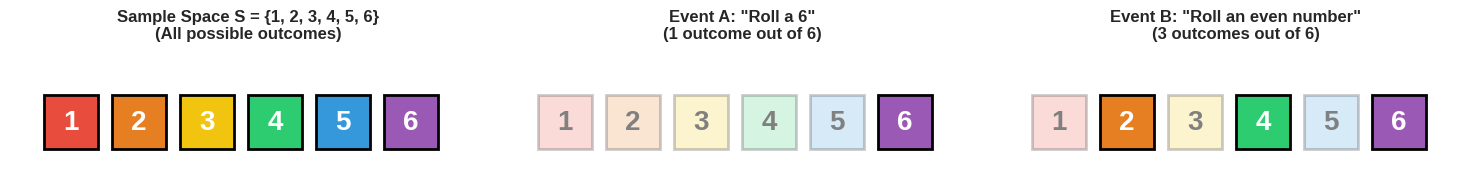

Sample Space: S = {1, 2, 3, 4, 5, 6}
Event A (Roll a 6): {6}           -> P(A) = 1/6
Event B (Even number): {2, 4, 6}  -> P(B) = 3/6 = 1/2


In [ ]:
# Visualizing the sample space of a die roll

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Colors for each die face
die_colors = ['#e74c3c', '#e67e22', '#f1c40f', '#2ecc71', '#3498db', '#9b59b6']

# 1. The Sample Space (all possible outcomes)
ax = axes[0]
for i, (face, color) in enumerate(zip(range(1, 7), die_colors)):
    ax.add_patch(plt.Rectangle((i, 0), 0.8, 0.8, color=color, ec='black', lw=2))
    ax.text(i + 0.4, 0.4, str(face), ha='center', va='center', fontsize=20, fontweight='bold', color='white')
ax.set_xlim(-0.5, 6.5)
ax.set_ylim(-0.5, 1.5)
ax.set_aspect('equal')
ax.axis('off')
ax.set_title('Sample Space S = {1, 2, 3, 4, 5, 6}\n(All possible outcomes)', fontsize=12, fontweight='bold')

# 2. Event A: Rolling a 6 (simple event)
ax = axes[1]
for i, (face, color) in enumerate(zip(range(1, 7), die_colors)):
    alpha = 1.0 if face == 6 else 0.2
    ax.add_patch(plt.Rectangle((i, 0), 0.8, 0.8, color=color, ec='black', lw=2, alpha=alpha))
    ax.text(i + 0.4, 0.4, str(face), ha='center', va='center', fontsize=20, fontweight='bold',
            color='white' if face == 6 else 'gray')
ax.set_xlim(-0.5, 6.5)
ax.set_ylim(-0.5, 1.5)
ax.set_aspect('equal')
ax.axis('off')
ax.set_title('Event A: "Roll a 6"\n(1 outcome out of 6)', fontsize=12, fontweight='bold')

# 3. Event B: Rolling an even number (compound event)
ax = axes[2]
for i, (face, color) in enumerate(zip(range(1, 7), die_colors)):
    alpha = 1.0 if face % 2 == 0 else 0.2
    ax.add_patch(plt.Rectangle((i, 0), 0.8, 0.8, color=color, ec='black', lw=2, alpha=alpha))
    ax.text(i + 0.4, 0.4, str(face), ha='center', va='center', fontsize=20, fontweight='bold',
            color='white' if face % 2 == 0 else 'gray')
ax.set_xlim(-0.5, 6.5)
ax.set_ylim(-0.5, 1.5)
ax.set_aspect('equal')
ax.axis('off')
ax.set_title('Event B: "Roll an even number"\n(3 outcomes out of 6)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("Sample Space: S = {1, 2, 3, 4, 5, 6}")
print("Event A (Roll a 6): {6}           -> P(A) = 1/6")
print("Event B (Even number): {2, 4, 6}  -> P(B) = 3/6 = 1/2")

### Calculating Simple Probabilities

For a fair die (or any situation where all outcomes are equally likely):

> **P(Event) = (Number of outcomes in event) / (Total outcomes in sample space)**

This is the **classical definition** of probability. It works when:
- We can list all possible outcomes
- All outcomes are equally likely

---

### A More Complex Example: Two Dice

Let's roll two dice and ask: "What's the probability of getting a sum of 7?"

First, we need to understand the sample space:

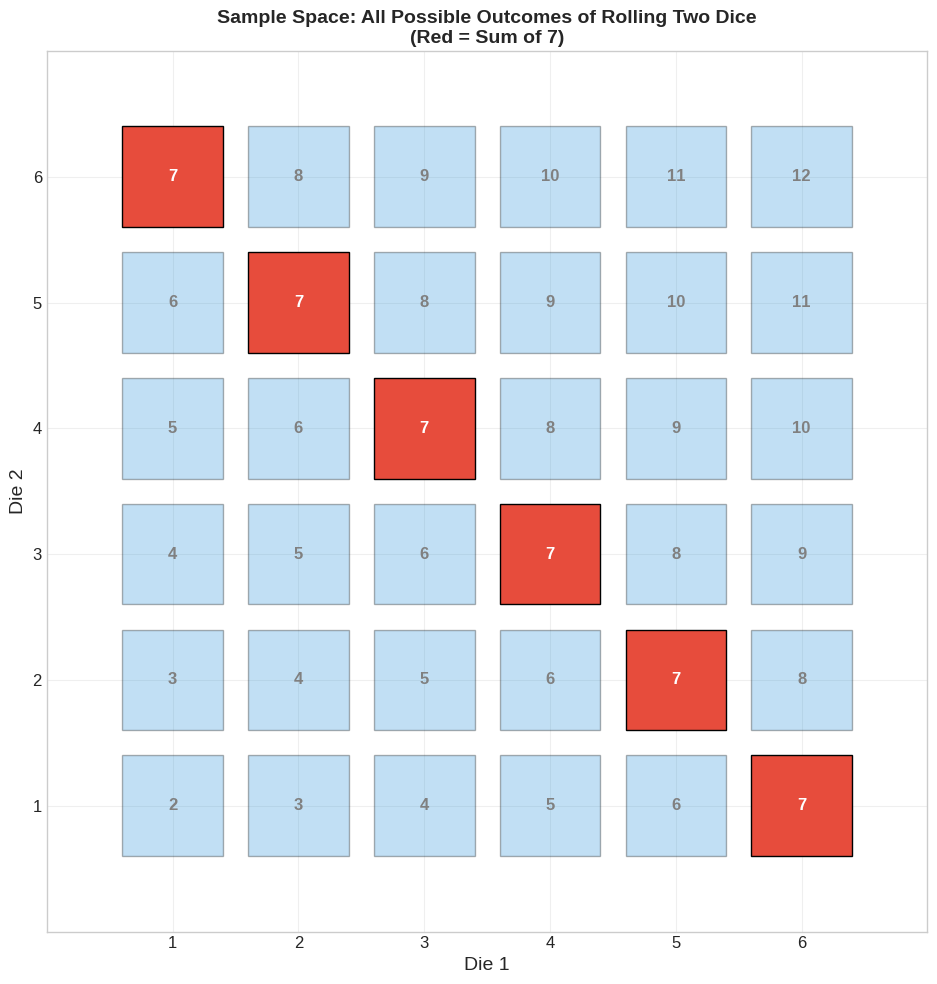

Total outcomes in sample space: 36
Outcomes that sum to 7: 6

P(sum = 7) = 6/36 = 0.1667 = 16.7%

The combinations that give 7: (1,6), (2,5), (3,4), (4,3), (5,2), (6,1)


In [ ]:
# Sample space for rolling two dice

fig, ax = plt.subplots(figsize=(10, 10))

# Create a grid for all possible outcomes
for die1 in range(1, 7):
    for die2 in range(1, 7):
        total = die1 + die2

        # Color by sum: highlight sum of 7
        if total == 7:
            color = '#e74c3c'  # Red for sum of 7
            alpha = 1.0
        else:
            color = '#3498db'  # Blue for others
            alpha = 0.3

        # Draw the outcome
        ax.add_patch(plt.Rectangle((die1 - 0.4, die2 - 0.4), 0.8, 0.8,
                                    color=color, ec='black', lw=1, alpha=alpha))
        ax.text(die1, die2, f'{total}', ha='center', va='center',
                fontsize=12, fontweight='bold', color='white' if total == 7 else 'gray')

ax.set_xlim(0, 7)
ax.set_ylim(0, 7)
ax.set_xlabel('Die 1', fontsize=14)
ax.set_ylabel('Die 2', fontsize=14)
ax.set_xticks(range(1, 7))
ax.set_yticks(range(1, 7))
ax.set_aspect('equal')
ax.set_title('Sample Space: All Possible Outcomes of Rolling Two Dice\n(Red = Sum of 7)',
             fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Count outcomes
total_outcomes = 36  # 6 x 6
sum_7_outcomes = 6   # (1,6), (2,5), (3,4), (4,3), (5,2), (6,1)

print(f"Total outcomes in sample space: {total_outcomes}")
print(f"Outcomes that sum to 7: {sum_7_outcomes}")
print(f"\nP(sum = 7) = {sum_7_outcomes}/{total_outcomes} = {sum_7_outcomes/total_outcomes:.4f} = {sum_7_outcomes/total_outcomes*100:.1f}%")
print("\nThe combinations that give 7: (1,6), (2,5), (3,4), (4,3), (5,2), (6,1)")

### Why This Matters for Deep Learning

In deep learning, our "sample space" is often the set of all possible classes:

| Problem | Sample Space | Example Event |
|---------|-------------|---------------|
| Image classification | {cat, dog, bird, ...} | "The image is a cat" |
| Sentiment analysis | {positive, negative, neutral} | "Review is positive" |
| Next word prediction | {the, a, is, ...} (vocabulary) | "Next word is 'the'" |

The neural network assigns a probability to each possible outcome!

---

### Types of Events

Let's clarify some important terminology:

| Event Type | Definition | Example |
|------------|------------|--------|
| **Simple Event** | A single outcome | Rolling a 6 |
| **Compound Event** | Multiple outcomes | Rolling an even number |
| **Complementary Event** | Everything NOT in the event | NOT rolling a 6 (rolling 1-5) |
| **Mutually Exclusive** | Events that can't both happen | Rolling 2 AND rolling 5 (impossible) |
| **Independent Events** | One doesn't affect the other | Two separate coin flips |

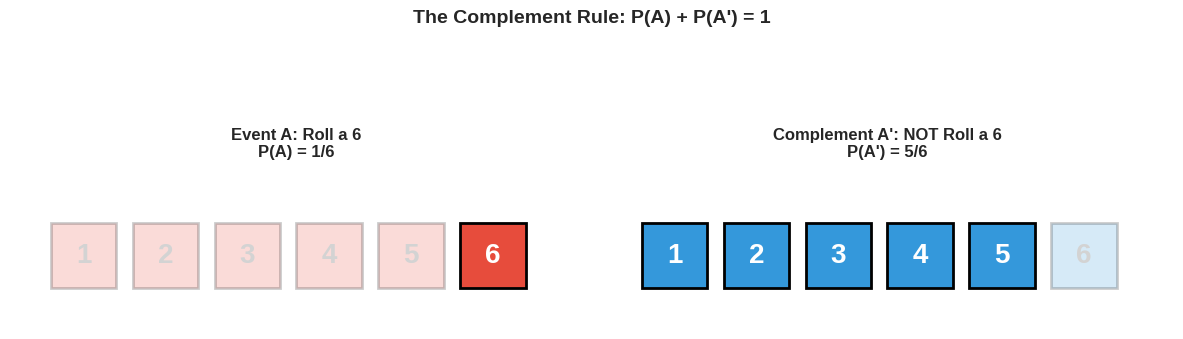

The Complement Rule:
P(A) + P(NOT A) = 1
P(6) + P(NOT 6) = 1/6 + 5/6 = 1

This is useful! If it's hard to calculate P(A), calculate P(NOT A) and subtract from 1.


In [ ]:
# Visualizing complementary events

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Event A and its complement
event_A = {6}  # Rolling a 6
complement_A = {1, 2, 3, 4, 5}  # NOT rolling a 6

for ax, event, title, color in zip(
    axes,
    [event_A, complement_A],
    ['Event A: Roll a 6\nP(A) = 1/6', 'Complement A\': NOT Roll a 6\nP(A\') = 5/6'],
    ['#e74c3c', '#3498db']
):
    for i, face in enumerate(range(1, 7)):
        alpha = 1.0 if face in event else 0.2
        ax.add_patch(plt.Rectangle((i, 0), 0.8, 0.8, color=color, ec='black', lw=2, alpha=alpha))
        ax.text(i + 0.4, 0.4, str(face), ha='center', va='center', fontsize=20, fontweight='bold',
                color='white' if face in event else 'lightgray')
    ax.set_xlim(-0.5, 6.5)
    ax.set_ylim(-0.5, 1.5)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title(title, fontsize=12, fontweight='bold')

plt.suptitle('The Complement Rule: P(A) + P(A\') = 1', fontsize=14, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()

print("The Complement Rule:")
print("P(A) + P(NOT A) = 1")
print(f"P(6) + P(NOT 6) = 1/6 + 5/6 = 1")
print("\nThis is useful! If it's hard to calculate P(A), calculate P(NOT A) and subtract from 1.")

### Notation Summary

Here's the notation we'll use throughout this notebook:

| Symbol | Meaning | Example |
|--------|---------|--------|
| P(A) | Probability of event A | P(heads) = 0.5 |
| P(A') or P(not A) | Probability of NOT A | P(not heads) = 0.5 |
| P(A and B) or P(A ∩ B) | Both A and B happen | P(heads AND rain) |
| P(A or B) or P(A ∪ B) | A or B (or both) happen | P(heads OR tails) = 1 |
| P(A \| B) | Probability of A given B happened | P(disease \| positive test) |

---

## Chapter 1 Summary

### What We Learned

1. **Experiment**: An action with uncertain outcome
2. **Sample Space**: All possible outcomes (must be complete)
3. **Event**: A specific outcome or set of outcomes we care about
4. **Simple probability**: P(Event) = favorable outcomes / total outcomes
5. **Complement rule**: P(A) + P(not A) = 1

### Key Insight

Understanding the sample space is crucial! Many probability mistakes come from not correctly identifying all possible outcomes.

### Coming Up Next

In Chapter 2, we'll learn how to combine probabilities using the addition and multiplication rules.

---

---

# Chapter 2: Basic Probability Rules

## Combining Probabilities

Now that we know the vocabulary, let's learn how to combine probabilities. There are two fundamental rules:

1. **Addition Rule**: For "or" situations
2. **Multiplication Rule**: For "and" situations

---

### The Addition Rule: "What's the chance of A OR B?"

**Story Time**: You're playing a card game and need to draw either a Heart or a King to win. What's your probability of winning?

Let's think through this carefully:
- P(Heart) = 13/52 (there are 13 hearts)
- P(King) = 4/52 (there are 4 kings)

Can we just add them? **No!** That would count the King of Hearts twice!

> **Addition Rule**: P(A or B) = P(A) + P(B) - P(A and B)

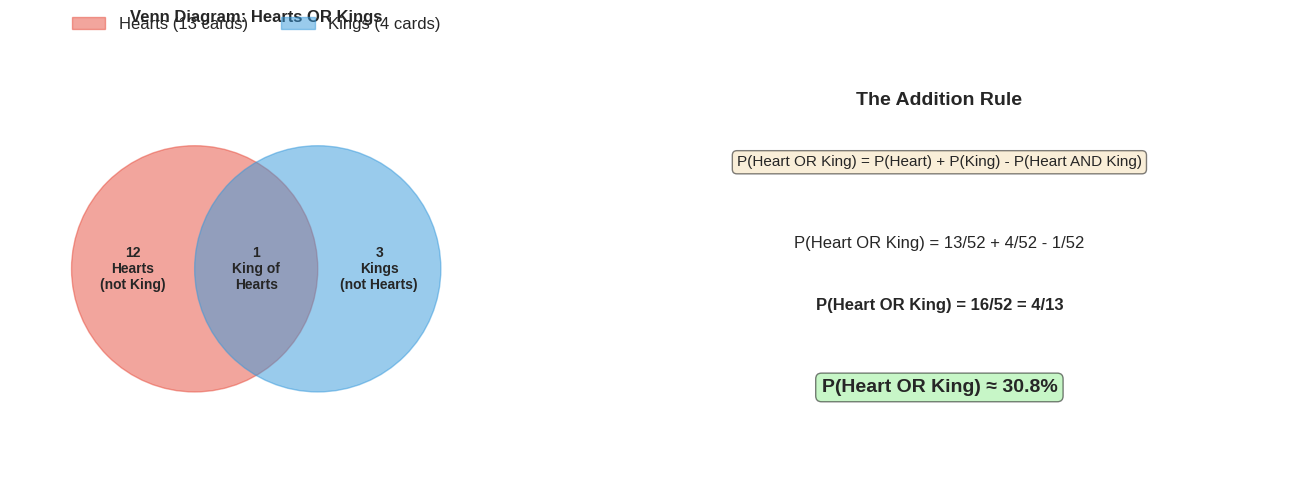

Why do we subtract P(A and B)?
Because the King of Hearts is in BOTH sets - we counted it twice!

Final answer: 12 + 1 + 3 = 16 cards out of 52


In [ ]:
# Visualizing the Addition Rule with a Venn Diagram

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left: Venn diagram
ax = axes[0]

# Draw circles
circle1 = plt.Circle((0.35, 0.5), 0.3, color='#e74c3c', alpha=0.5, label='Hearts (13 cards)')
circle2 = plt.Circle((0.65, 0.5), 0.3, color='#3498db', alpha=0.5, label='Kings (4 cards)')

ax.add_patch(circle1)
ax.add_patch(circle2)

# Labels
ax.text(0.2, 0.5, '12\nHearts\n(not King)', ha='center', va='center', fontsize=10, fontweight='bold')
ax.text(0.5, 0.5, '1\nKing of\nHearts', ha='center', va='center', fontsize=10, fontweight='bold')
ax.text(0.8, 0.5, '3\nKings\n(not Hearts)', ha='center', va='center', fontsize=10, fontweight='bold')

ax.set_xlim(-0.1, 1.1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')
ax.axis('off')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)
ax.set_title('Venn Diagram: Hearts OR Kings', fontsize=12, fontweight='bold', pad=30)

# Right: The calculation
ax = axes[1]
ax.text(0.5, 0.9, 'The Addition Rule', fontsize=14, fontweight='bold', ha='center', transform=ax.transAxes)
ax.text(0.5, 0.75, 'P(Heart OR King) = P(Heart) + P(King) - P(Heart AND King)',
        fontsize=11, ha='center', transform=ax.transAxes,
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
ax.text(0.5, 0.55, 'P(Heart OR King) = 13/52 + 4/52 - 1/52',
        fontsize=12, ha='center', transform=ax.transAxes)
ax.text(0.5, 0.40, 'P(Heart OR King) = 16/52 = 4/13',
        fontsize=12, ha='center', transform=ax.transAxes, fontweight='bold')
ax.text(0.5, 0.20, f'P(Heart OR King) ≈ {16/52:.1%}',
        fontsize=14, ha='center', transform=ax.transAxes, fontweight='bold',
        bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))
ax.axis('off')

plt.tight_layout()
plt.show()

print("Why do we subtract P(A and B)?")
print("Because the King of Hearts is in BOTH sets - we counted it twice!")
print("\nFinal answer: 12 + 1 + 3 = 16 cards out of 52")

### Special Case: Mutually Exclusive Events

If events A and B can't happen at the same time (mutually exclusive), then P(A and B) = 0.

In this case: **P(A or B) = P(A) + P(B)**

**Example**: What's the probability of rolling a 2 OR a 5 on a die?
- These are mutually exclusive (you can't roll both at once)
- P(2 or 5) = P(2) + P(5) = 1/6 + 1/6 = 2/6 = 1/3

---

### The Multiplication Rule: "What's the chance of A AND B?"

**Story Time**: You flip a coin and roll a die. What's the probability of getting Heads AND rolling a 6?

These are **independent events** - the coin flip doesn't affect the die roll.

> **Multiplication Rule (Independent Events)**: P(A and B) = P(A) × P(B)

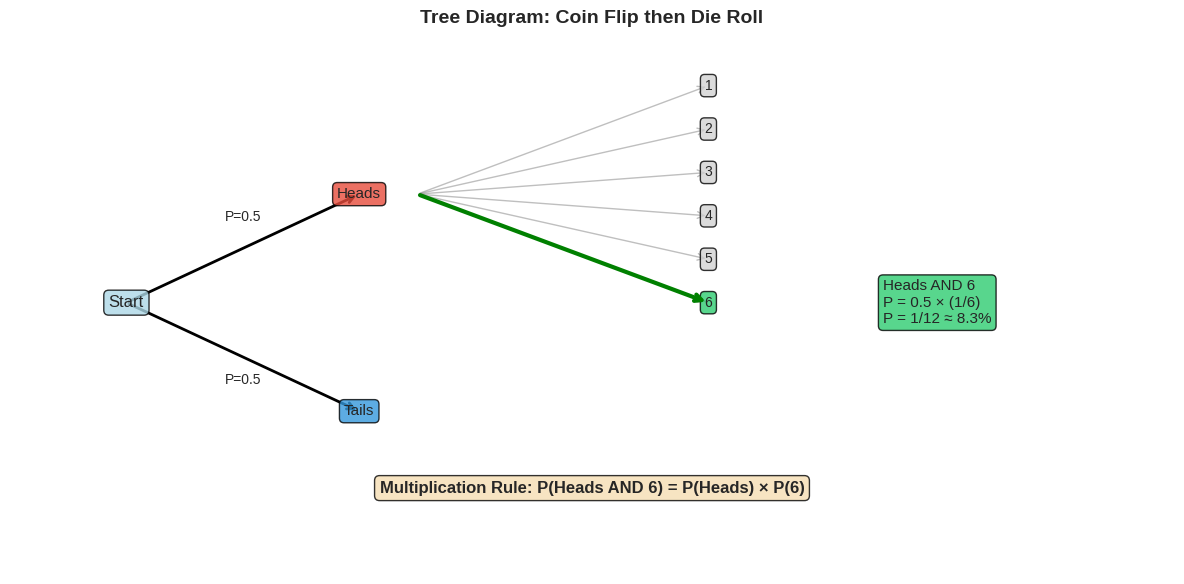

For independent events:
P(A AND B) = P(A) × P(B)
P(Heads AND 6) = 0.5 × (1/6) = 0.0833 = 1/12


In [ ]:
# Visualizing the Multiplication Rule

fig, ax = plt.subplots(figsize=(12, 6))

# Create a tree diagram
# Coin flip outcomes
ax.annotate('', xy=(0.3, 0.7), xytext=(0.1, 0.5),
            arrowprops=dict(arrowstyle='->', color='black', lw=2))
ax.annotate('', xy=(0.3, 0.3), xytext=(0.1, 0.5),
            arrowprops=dict(arrowstyle='->', color='black', lw=2))

# Labels
ax.text(0.1, 0.5, 'Start', fontsize=12, ha='center', va='center',
        bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
ax.text(0.2, 0.65, 'P=0.5', fontsize=10, ha='center')
ax.text(0.2, 0.35, 'P=0.5', fontsize=10, ha='center')

ax.text(0.3, 0.7, 'Heads', fontsize=11, ha='center', va='center',
        bbox=dict(boxstyle='round', facecolor='#e74c3c', alpha=0.8))
ax.text(0.3, 0.3, 'Tails', fontsize=11, ha='center', va='center',
        bbox=dict(boxstyle='round', facecolor='#3498db', alpha=0.8))

# Die outcomes from Heads
die_faces = [1, 2, 3, 4, 5, 6]
y_positions = np.linspace(0.9, 0.5, 6)

for face, y in zip(die_faces, y_positions):
    ax.annotate('', xy=(0.6, y), xytext=(0.35, 0.7),
                arrowprops=dict(arrowstyle='->', color='gray', lw=1, alpha=0.5))
    color = '#2ecc71' if face == 6 else 'lightgray'
    ax.text(0.6, y, f'{face}', fontsize=10, ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor=color, alpha=0.8))

# Highlight the winning path
ax.annotate('', xy=(0.6, 0.5), xytext=(0.35, 0.7),
            arrowprops=dict(arrowstyle='->', color='green', lw=3))

# Result annotation
ax.text(0.75, 0.5, 'Heads AND 6\nP = 0.5 × (1/6)\nP = 1/12 ≈ 8.3%',
        fontsize=11, ha='left', va='center',
        bbox=dict(boxstyle='round', facecolor='#2ecc71', alpha=0.8))

ax.text(0.5, 0.15, 'Multiplication Rule: P(Heads AND 6) = P(Heads) × P(6)',
        fontsize=12, ha='center', fontweight='bold',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')
ax.set_title('Tree Diagram: Coin Flip then Die Roll', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("For independent events:")
print("P(A AND B) = P(A) × P(B)")
print(f"P(Heads AND 6) = 0.5 × (1/6) = {0.5 * (1/6):.4f} = 1/12")

### Deep Learning Connection: Independent Features

In the **Naive Bayes** classifier, we assume features are independent:

P(word₁="great" AND word₂="movie" | positive review)
= P(word₁="great" | positive) × P(word₂="movie" | positive)

This "naive" independence assumption makes computation tractable, even though it's not perfectly true in reality.

---

### Summary of Rules

| Situation | Rule | Formula |
|-----------|------|--------|
| A OR B (general) | Addition Rule | P(A ∪ B) = P(A) + P(B) - P(A ∩ B) |
| A OR B (mutually exclusive) | Simple Addition | P(A ∪ B) = P(A) + P(B) |
| A AND B (independent) | Multiplication Rule | P(A ∩ B) = P(A) × P(B) |
| NOT A | Complement Rule | P(A') = 1 - P(A) |

In [ ]:
# Practice: Let's verify these rules with simulation

n_trials = 100000

# Simulate coin flips and die rolls
coins = np.random.choice(['H', 'T'], n_trials)
dice = np.random.randint(1, 7, n_trials)

# Count outcomes
heads_and_6 = np.sum((coins == 'H') & (dice == 6))
heads_or_6 = np.sum((coins == 'H') | (dice == 6))

# Calculate probabilities
p_heads = np.sum(coins == 'H') / n_trials
p_six = np.sum(dice == 6) / n_trials

print(f"Simulation with {n_trials:,} trials:")
print("="*50)
print(f"P(Heads) = {p_heads:.4f} (expected: 0.5000)")
print(f"P(6) = {p_six:.4f} (expected: 0.1667)")
print()
print(f"P(Heads AND 6):")
print(f"  Simulated: {heads_and_6/n_trials:.4f}")
print(f"  Calculated: {0.5 * (1/6):.4f}")
print()
print(f"P(Heads OR 6):")
print(f"  Simulated: {heads_or_6/n_trials:.4f}")
print(f"  Calculated: {0.5 + 1/6 - 0.5*(1/6):.4f}")

Simulation with 100,000 trials:
P(Heads) = 0.4984 (expected: 0.5000)
P(6) = 0.1652 (expected: 0.1667)

P(Heads AND 6):
  Simulated: 0.0828
  Calculated: 0.0833

P(Heads OR 6):
  Simulated: 0.5808
  Calculated: 0.5833


## Chapter 2 Summary

### What We Learned

1. **Addition Rule**: P(A or B) = P(A) + P(B) - P(A and B)
2. **Multiplication Rule** (independent): P(A and B) = P(A) × P(B)
3. **Mutually exclusive**: Events that can't happen together
4. **Independent events**: One doesn't affect the other

### Coming Up Next

Chapter 3 introduces **conditional probability** - how our beliefs change when we learn new information. This is crucial for understanding how neural networks update their predictions!

---

---

# Chapter 3: Conditional Probability

## How New Information Changes Everything

This is where probability gets really interesting - and really useful for deep learning.

---

### The Big Idea

**Conditional probability** answers: "What's the probability of A, *given that* B happened?"

Written as: **P(A | B)** (read: "probability of A given B")

---

### Story Time: The Weather Example

Imagine you're planning a picnic. Let's think about rain:

- **Without any information**: P(rain tomorrow) = 30% (base rate for your city)
- **Seeing dark clouds right now**: P(rain tomorrow | dark clouds today) = 70%
- **Checking weather radar**: P(rain tomorrow | storm system approaching) = 90%

Notice how the probability changes as we get more information? That's conditional probability!

---

### The Deep Learning Connection (Sneak Peek)

When a neural network classifies an image, it's computing:

> **P(cat | image pixels)** - "What's the probability this is a cat, *given* these specific pixels?"

The entire job of a classifier is to compute conditional probabilities!

---

### Intuitive Example: Drawing Cards

Let's build intuition with a simple example.

**Setup**: A standard deck of 52 cards.

**Question 1**: What's P(King)?
- Answer: 4/52 = 1/13 ≈ 7.7%

**Question 2**: What's P(King | card is a face card)?
- Face cards = Jack, Queen, King (12 cards total)
- Kings among face cards = 4
- Answer: 4/12 = 1/3 ≈ 33.3%

**Knowing the card is a face card dramatically increases the probability it's a King!**

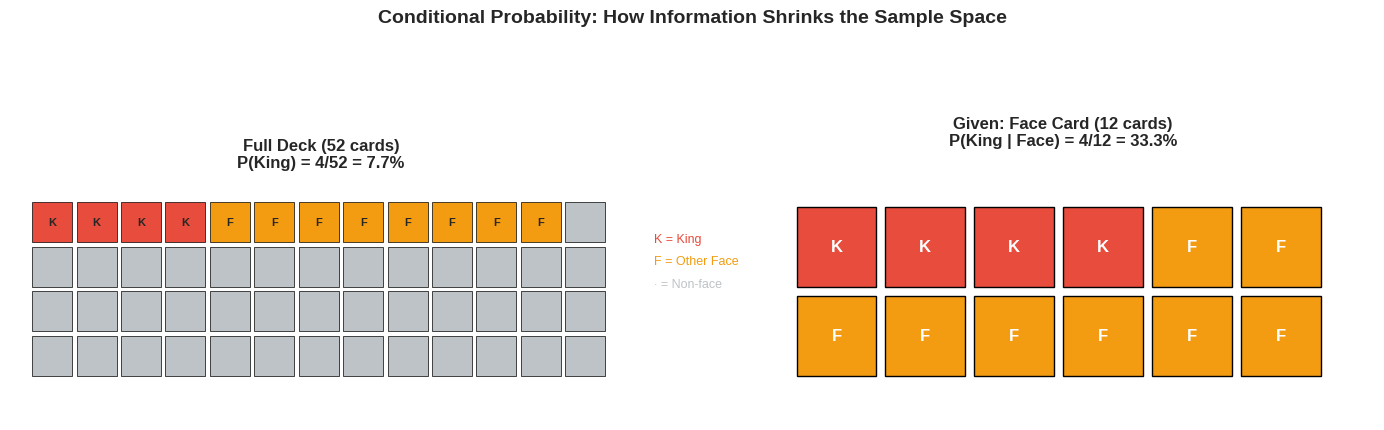

Key Insight:
When we know the card is a face card, we're only considering 12 cards, not 52!
P(King) = 7.7% → P(King | Face Card) = 33.3%

The condition SHRINKS our sample space.


In [ ]:
# Visualizing conditional probability with cards

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left: All cards
ax = axes[0]
# Represent deck as grid
kings = 4
other_face = 8  # Jacks and Queens
non_face = 40

# Create visual
cards = ['K']*kings + ['F']*other_face + ['·']*non_face
colors = ['#e74c3c']*kings + ['#f39c12']*other_face + ['#bdc3c7']*non_face

for i, (card, color) in enumerate(zip(cards, colors)):
    row, col = i // 13, i % 13
    ax.add_patch(plt.Rectangle((col, 3-row), 0.9, 0.9, color=color, ec='black', lw=0.5))
    if card != '·':
        ax.text(col + 0.45, 3-row + 0.45, card, ha='center', va='center', fontsize=8, fontweight='bold')

ax.set_xlim(-0.5, 13.5)
ax.set_ylim(-0.5, 4.5)
ax.set_aspect('equal')
ax.axis('off')
ax.set_title(f'Full Deck (52 cards)\nP(King) = 4/52 = {4/52:.1%}', fontsize=12, fontweight='bold')

# Legend
ax.text(14, 3, 'K = King', fontsize=9, color='#e74c3c')
ax.text(14, 2.5, 'F = Other Face', fontsize=9, color='#f39c12')
ax.text(14, 2, '· = Non-face', fontsize=9, color='#bdc3c7')

# Right: Only face cards
ax = axes[1]
face_cards = ['K']*kings + ['F']*other_face
face_colors = ['#e74c3c']*kings + ['#f39c12']*other_face

for i, (card, color) in enumerate(zip(face_cards, face_colors)):
    row, col = i // 6, i % 6
    ax.add_patch(plt.Rectangle((col, 1-row), 0.9, 0.9, color=color, ec='black', lw=1))
    ax.text(col + 0.45, 1-row + 0.45, card, ha='center', va='center', fontsize=12, fontweight='bold', color='white')

ax.set_xlim(-0.5, 6.5)
ax.set_ylim(-0.5, 2.5)
ax.set_aspect('equal')
ax.axis('off')
ax.set_title(f'Given: Face Card (12 cards)\nP(King | Face) = 4/12 = {4/12:.1%}', fontsize=12, fontweight='bold')

plt.suptitle('Conditional Probability: How Information Shrinks the Sample Space',
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("Key Insight:")
print("When we know the card is a face card, we're only considering 12 cards, not 52!")
print(f"P(King) = {4/52:.1%} → P(King | Face Card) = {4/12:.1%}")
print("\nThe condition SHRINKS our sample space.")

### The Formal Definition

Now that we have intuition, here's the formula:

> **P(A | B) = P(A and B) / P(B)**

In words: "The probability of A given B equals the probability of both happening, divided by the probability of B."

**Why does this make sense?**
- P(A and B) counts outcomes where both A and B occur
- P(B) is our new, smaller sample space (we know B happened)
- We're finding what fraction of B outcomes are also A outcomes

In [ ]:
# Verify the formula with our card example

# P(King and Face Card) = P(King) because all Kings are face cards
p_king_and_face = 4/52  # 4 kings out of 52

# P(Face Card)
p_face = 12/52  # 12 face cards out of 52

# P(King | Face Card) using the formula
p_king_given_face = p_king_and_face / p_face

print("Verifying the Conditional Probability Formula")
print("="*50)
print(f"P(King and Face) = {p_king_and_face:.4f} = {4}/52")
print(f"P(Face Card) = {p_face:.4f} = {12}/52")
print()
print(f"P(King | Face) = P(King and Face) / P(Face)")
print(f"              = ({4}/52) / ({12}/52)")
print(f"              = {4}/{12}")
print(f"              = {p_king_given_face:.4f}")
print(f"              = {p_king_given_face:.1%}")

Verifying the Conditional Probability Formula
P(King and Face) = 0.0769 = 4/52
P(Face Card) = 0.2308 = 12/52

P(King | Face) = P(King and Face) / P(Face)
              = (4/52) / (12/52)
              = 4/12
              = 0.3333
              = 33.3%


### Another Example: Medical Testing

This example will set us up perfectly for Bayes' Theorem in the next chapter.

**Scenario**: A disease affects 1% of the population. A test for the disease has:
- 95% sensitivity: P(positive | have disease) = 0.95
- 5% false positive rate: P(positive | no disease) = 0.05

**Question**: If you test positive, what's P(have disease | positive test)?

This seems like it should be high, but let's see...

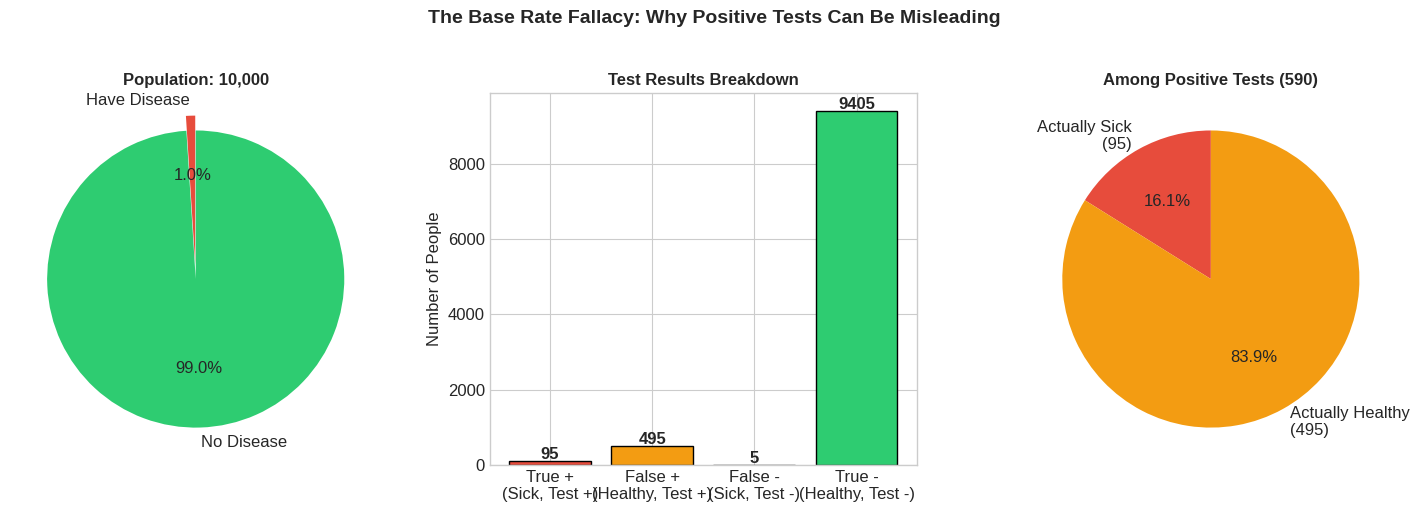


The Surprising Result:
If you test positive, there's only a 16.1% chance you actually have the disease!

Why? Because:
- Only 100 people have the disease
- But 495 healthy people also test positive (false positives)
- So out of 590 positive tests, only 95 are truly sick


In [ ]:
# Medical testing example - visualizing with a population

# Imagine 10,000 people
population = 10000
disease_rate = 0.01  # 1% have disease
sensitivity = 0.95   # P(+|disease)
false_positive = 0.05  # P(+|no disease)

# Calculate groups
have_disease = int(population * disease_rate)  # 100 people
no_disease = population - have_disease  # 9,900 people

# Test results
true_positives = int(have_disease * sensitivity)  # 95
false_negatives = have_disease - true_positives  # 5
false_positives = int(no_disease * false_positive)  # 495
true_negatives = no_disease - false_positives  # 9,405

# Total positive tests
total_positives = true_positives + false_positives  # 590

# P(disease | positive)
p_disease_given_positive = true_positives / total_positives

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 1. Population breakdown
ax = axes[0]
ax.pie([have_disease, no_disease], labels=['Have Disease', 'No Disease'],
       colors=['#e74c3c', '#2ecc71'], autopct='%1.1f%%', startangle=90,
       explode=[0.1, 0])
ax.set_title(f'Population: {population:,}', fontsize=12, fontweight='bold')

# 2. Test results breakdown
ax = axes[1]
categories = ['True +\n(Sick, Test +)', 'False +\n(Healthy, Test +)',
              'False -\n(Sick, Test -)', 'True -\n(Healthy, Test -)']
values = [true_positives, false_positives, false_negatives, true_negatives]
colors = ['#e74c3c', '#f39c12', '#9b59b6', '#2ecc71']
ax.bar(categories, values, color=colors, edgecolor='black')
ax.set_ylabel('Number of People')
ax.set_title('Test Results Breakdown', fontsize=12, fontweight='bold')
for i, v in enumerate(values):
    ax.text(i, v + 50, str(v), ha='center', fontweight='bold')

# 3. Among positive tests
ax = axes[2]
ax.pie([true_positives, false_positives],
       labels=[f'Actually Sick\n({true_positives})', f'Actually Healthy\n({false_positives})'],
       colors=['#e74c3c', '#f39c12'], autopct='%1.1f%%', startangle=90)
ax.set_title(f'Among Positive Tests ({total_positives})', fontsize=12, fontweight='bold')

plt.suptitle('The Base Rate Fallacy: Why Positive Tests Can Be Misleading',
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\nThe Surprising Result:")
print("="*50)
print(f"If you test positive, there's only a {p_disease_given_positive:.1%} chance you actually have the disease!")
print(f"\nWhy? Because:")
print(f"- Only {have_disease} people have the disease")
print(f"- But {false_positives} healthy people also test positive (false positives)")
print(f"- So out of {total_positives} positive tests, only {true_positives} are truly sick")

### The Base Rate Fallacy

This surprising result is called the **base rate fallacy** or **prosecutor's fallacy**.

The key insight:
> **When the base rate is low, even good tests produce many false positives!**

This matters in deep learning because:
- **Imbalanced datasets**: If 99% of emails are not spam, a model might learn to say "not spam" for everything
- **Rare events**: Detecting fraud, diseases, defects - base rates are often very low
- **Metrics**: Accuracy can be misleading; precision and recall matter

---

## Chapter 3 Summary

### What We Learned

1. **Conditional probability** = P(A | B) = probability of A given B happened
2. **Formula**: P(A | B) = P(A and B) / P(B)
3. **Conditions shrink the sample space** - we only consider outcomes where B occurred
4. **Base rate fallacy** - ignoring prior probabilities leads to wrong conclusions

### The Neural Network Connection

A classifier computes **P(class | input)**:
- Input: image pixels, text, features
- Output: probability distribution over classes

### Coming Up Next

Chapter 4 introduces **Bayes' Theorem** - the mathematical tool for updating beliefs with evidence. It's one of the most important ideas in all of probability!

---

---

# Chapter 4: Bayes' Theorem

## The Most Important Equation in Probability

Bayes' Theorem is a simple equation with profound implications. It tells us how to **update our beliefs** when we get new evidence.

---

### The Problem Bayes Solves

We often know P(evidence | hypothesis) but want P(hypothesis | evidence).

**Example:**
- We know: P(positive test | disease) = 95% (this is what the test manufacturer tells us)
- We want: P(disease | positive test) (this is what the patient cares about!)

These are **not the same thing!** Bayes' Theorem connects them.

---

### The Theorem

$$P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}$$

Let's give each part a name:

| Term | Name | Meaning |
|------|------|--------|
| P(A) | **Prior** | What we believed before seeing evidence |
| P(B\|A) | **Likelihood** | How likely is the evidence if A is true |
| P(A\|B) | **Posterior** | What we believe after seeing evidence |
| P(B) | **Evidence** | How likely is the evidence overall |

In words:

> **Posterior = (Likelihood × Prior) / Evidence**

### Intuitive Explanation

Think of Bayes' Theorem as a **belief update machine**:

1. **Start with a prior belief** (P(A)): "I think there's a 1% chance I have the disease"
2. **Observe evidence** (B): "I tested positive"
3. **Update belief** (P(A|B)): "Now I think there's a 16% chance I have the disease"

The theorem tells us exactly how much to update!

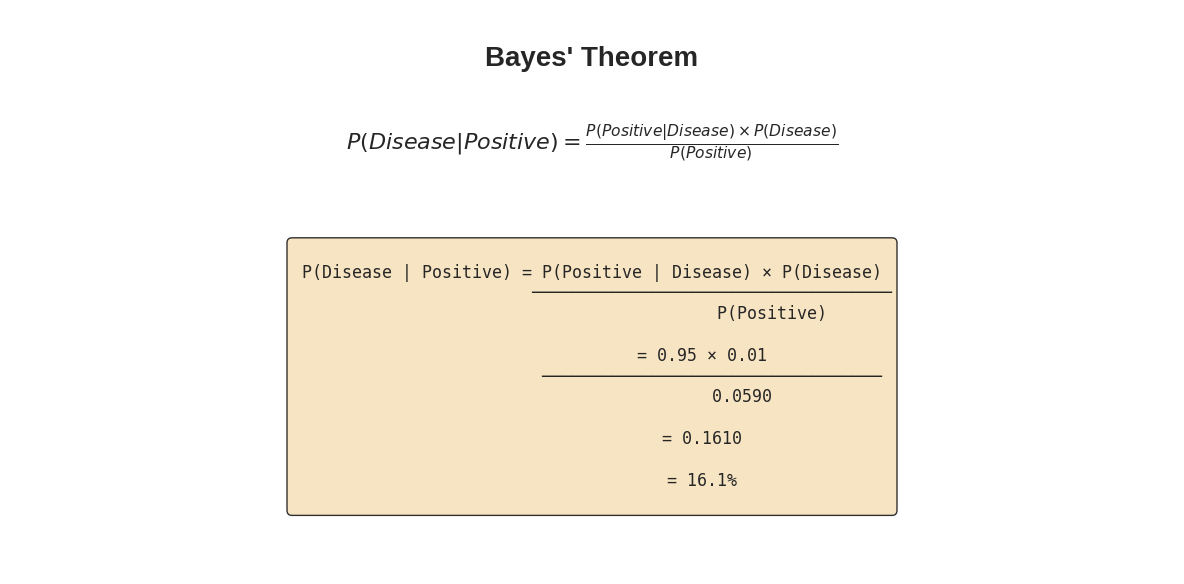


Breaking down the calculation:
Prior P(Disease) = 1.00%
Likelihood P(+|Disease) = 95%
P(+|Healthy) = 5%

P(Positive) = P(+|D)×P(D) + P(+|H)×P(H)
           = 0.95×0.01 + 0.05×0.99
           = 0.0590

Posterior P(Disease|Positive) = 0.1610 = 16.1%


In [ ]:
# Bayes' Theorem: Medical Diagnosis Example

def bayes_theorem(prior, likelihood, p_evidence):
    """Calculate posterior using Bayes' theorem"""
    return (likelihood * prior) / p_evidence

# Our medical example
P_disease = 0.01           # Prior: 1% of population has disease
P_positive_given_disease = 0.95   # Likelihood: 95% detection rate
P_positive_given_healthy = 0.05   # False positive rate: 5%

# Calculate P(evidence) using law of total probability
P_positive = (P_positive_given_disease * P_disease +
              P_positive_given_healthy * (1 - P_disease))

# Apply Bayes' theorem
P_disease_given_positive = bayes_theorem(P_disease, P_positive_given_disease, P_positive)

# Visualize the calculation
fig, ax = plt.subplots(figsize=(12, 6))

# Create a visual representation of the formula
ax.text(0.5, 0.9, "Bayes' Theorem", fontsize=20, fontweight='bold', ha='center', transform=ax.transAxes)

# The formula
ax.text(0.5, 0.75, r'$P(Disease|Positive) = \frac{P(Positive|Disease) \times P(Disease)}{P(Positive)}$',
        fontsize=16, ha='center', transform=ax.transAxes)

# The values
formula_text = f'''
P(Disease | Positive) = P(Positive | Disease) × P(Disease)
                        ────────────────────────────────────
                                    P(Positive)

                      = {P_positive_given_disease} × {P_disease}
                        ──────────────────────────────────
                              {P_positive:.4f}

                      = {P_disease_given_positive:.4f}

                      = {P_disease_given_positive:.1%}
'''
ax.text(0.5, 0.35, formula_text, fontsize=12, ha='center', va='center',
        transform=ax.transAxes, family='monospace',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

ax.axis('off')
plt.tight_layout()
plt.show()

print("\nBreaking down the calculation:")
print("="*50)
print(f"Prior P(Disease) = {P_disease:.2%}")
print(f"Likelihood P(+|Disease) = {P_positive_given_disease:.0%}")
print(f"P(+|Healthy) = {P_positive_given_healthy:.0%}")
print(f"\nP(Positive) = P(+|D)×P(D) + P(+|H)×P(H)")
print(f"           = {P_positive_given_disease}×{P_disease} + {P_positive_given_healthy}×{1-P_disease}")
print(f"           = {P_positive:.4f}")
print(f"\nPosterior P(Disease|Positive) = {P_disease_given_positive:.4f} = {P_disease_given_positive:.1%}")

### Visualizing the Update Process

Let's see how the prior belief transforms into the posterior:

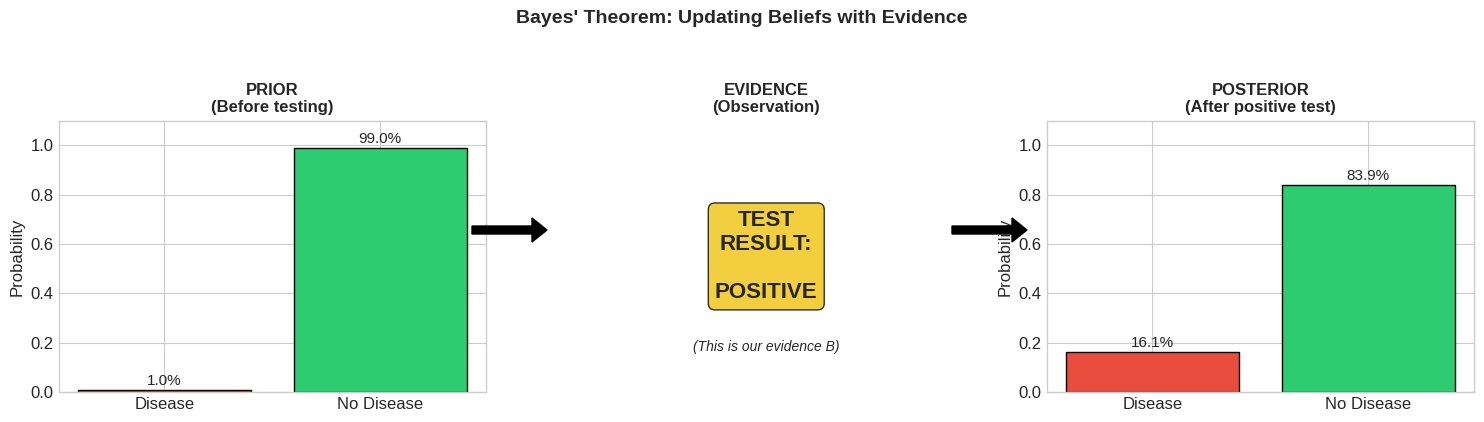

Belief in disease went from 1.0% to 16.1%
That's a 16.1x increase!

But still, most likely you DON'T have the disease.


In [ ]:
# Visualizing belief update

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 1. Prior belief
ax = axes[0]
ax.bar(['Disease', 'No Disease'], [P_disease, 1-P_disease],
       color=['#e74c3c', '#2ecc71'], edgecolor='black')
ax.set_ylim(0, 1.1)
ax.set_title('PRIOR\n(Before testing)', fontsize=12, fontweight='bold')
ax.set_ylabel('Probability')
for i, v in enumerate([P_disease, 1-P_disease]):
    ax.text(i, v + 0.02, f'{v:.1%}', ha='center', fontsize=11)

# 2. Evidence (the test)
ax = axes[1]
ax.text(0.5, 0.5, 'TEST\nRESULT:\n\nPOSITIVE', fontsize=16, ha='center', va='center',
        transform=ax.transAxes, fontweight='bold',
        bbox=dict(boxstyle='round', facecolor='#f1c40f', alpha=0.8))
ax.text(0.5, 0.15, '(This is our evidence B)', fontsize=10, ha='center',
        transform=ax.transAxes, style='italic')
ax.axis('off')
ax.set_title('EVIDENCE\n(Observation)', fontsize=12, fontweight='bold')

# 3. Posterior belief
ax = axes[2]
ax.bar(['Disease', 'No Disease'], [P_disease_given_positive, 1-P_disease_given_positive],
       color=['#e74c3c', '#2ecc71'], edgecolor='black')
ax.set_ylim(0, 1.1)
ax.set_title('POSTERIOR\n(After positive test)', fontsize=12, fontweight='bold')
ax.set_ylabel('Probability')
for i, v in enumerate([P_disease_given_positive, 1-P_disease_given_positive]):
    ax.text(i, v + 0.02, f'{v:.1%}', ha='center', fontsize=11)

# Add arrows
fig.patches.extend([plt.Arrow(0.32, 0.5, 0.05, 0, width=0.1, transform=fig.transFigure,
                              facecolor='black', edgecolor='black')])
fig.patches.extend([plt.Arrow(0.64, 0.5, 0.05, 0, width=0.1, transform=fig.transFigure,
                              facecolor='black', edgecolor='black')])

plt.suptitle("Bayes' Theorem: Updating Beliefs with Evidence", fontsize=14, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()

print(f"Belief in disease went from {P_disease:.1%} to {P_disease_given_positive:.1%}")
print(f"That's a {P_disease_given_positive/P_disease:.1f}x increase!")
print("\nBut still, most likely you DON'T have the disease.")

### Sequential Updating: What if You Test Again?

One of the beautiful properties of Bayes' Theorem is that we can apply it repeatedly. The posterior from one update becomes the prior for the next!

Sequential Testing:
Initial belief: P(Disease) = 1.00%
After test 1 (+): P(Disease) = 16.10%
After test 2 (+): P(Disease) = 78.48%
After test 3 (+): P(Disease) = 98.58%
After test 4 (-): P(Disease) = 78.48%
After test 5 (+): P(Disease) = 98.58%


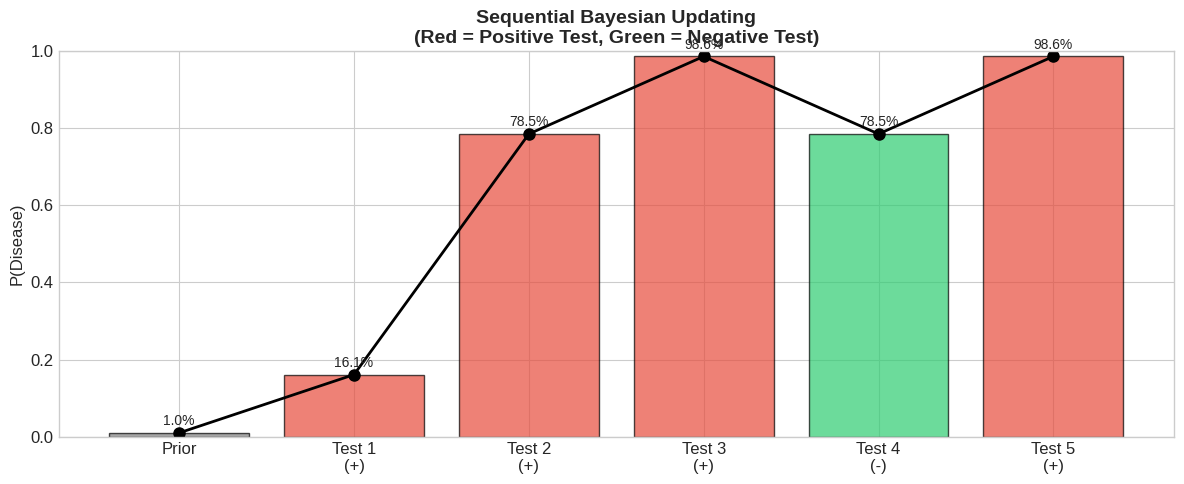


Notice how each test updates our belief!
Positive tests increase belief, negative tests decrease it.


In [ ]:
# Sequential Bayesian updating

def update_belief(prior, positive_test=True, sensitivity=0.95, false_positive=0.05):
    """Update belief about disease after a test result"""
    if positive_test:
        likelihood = sensitivity
        likelihood_neg = false_positive
    else:
        likelihood = 1 - sensitivity  # P(-|Disease)
        likelihood_neg = 1 - false_positive  # P(-|No Disease)

    p_evidence = likelihood * prior + likelihood_neg * (1 - prior)
    posterior = (likelihood * prior) / p_evidence
    return posterior

# Start with prior
belief = P_disease
beliefs = [belief]
test_results = ['+', '+', '+', '-', '+']  # Series of test results

print("Sequential Testing:")
print("="*50)
print(f"Initial belief: P(Disease) = {belief:.2%}")

for i, result in enumerate(test_results):
    positive = (result == '+')
    belief = update_belief(belief, positive)
    beliefs.append(belief)
    print(f"After test {i+1} ({result}): P(Disease) = {belief:.2%}")

# Visualize
fig, ax = plt.subplots(figsize=(12, 5))

x = range(len(beliefs))
colors = ['gray'] + ['#e74c3c' if r=='+' else '#2ecc71' for r in test_results]

ax.bar(x, beliefs, color=colors, edgecolor='black', alpha=0.7)
ax.plot(x, beliefs, 'ko-', markersize=8, linewidth=2)

labels = ['Prior'] + [f'Test {i+1}\n({r})' for i, r in enumerate(test_results)]
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('P(Disease)')
ax.set_title('Sequential Bayesian Updating\n(Red = Positive Test, Green = Negative Test)',
             fontsize=14, fontweight='bold')
ax.set_ylim(0, 1)

for i, b in enumerate(beliefs):
    ax.text(i, b + 0.02, f'{b:.1%}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

print("\nNotice how each test updates our belief!")
print("Positive tests increase belief, negative tests decrease it.")

---

# Chapter 5: Random Variables

## Giving Numbers to Uncertainty

So far we've talked about events like "rolling a 6" or "testing positive." But often we want to work with **numerical outcomes**. That's where random variables come in.

---

### What is a Random Variable?

A **random variable** is simply a variable whose value is determined by a random process.

**Examples:**
- X = the number showing when you roll a die (X can be 1, 2, 3, 4, 5, or 6)
- Y = the height of a randomly selected person
- Z = the number of heads in 10 coin flips

We use capital letters (X, Y, Z) for random variables and lowercase (x, y, z) for their specific values.

---

### Two Types of Random Variables

| Type | Definition | Examples | Deep Learning Use |
|------|------------|----------|------------------|
| **Discrete** | Can only take specific, countable values | Die roll, class labels, word tokens | Classification |
| **Continuous** | Can take any value in a range | Height, temperature, pixel intensity | Regression |